In [5]:
import os
import tarfile
from six.moves import urllib

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "dataset/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml/master/dataset/housing/housing.tgz


In [7]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
print(HOUSING_PATH)

dataset/housing


In [9]:
import pandas as pd
def load_housing_data(housing_path="D:\GitRepository\MLWithSKLearnAndTFBook\handson-ml\datasets\housing"):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


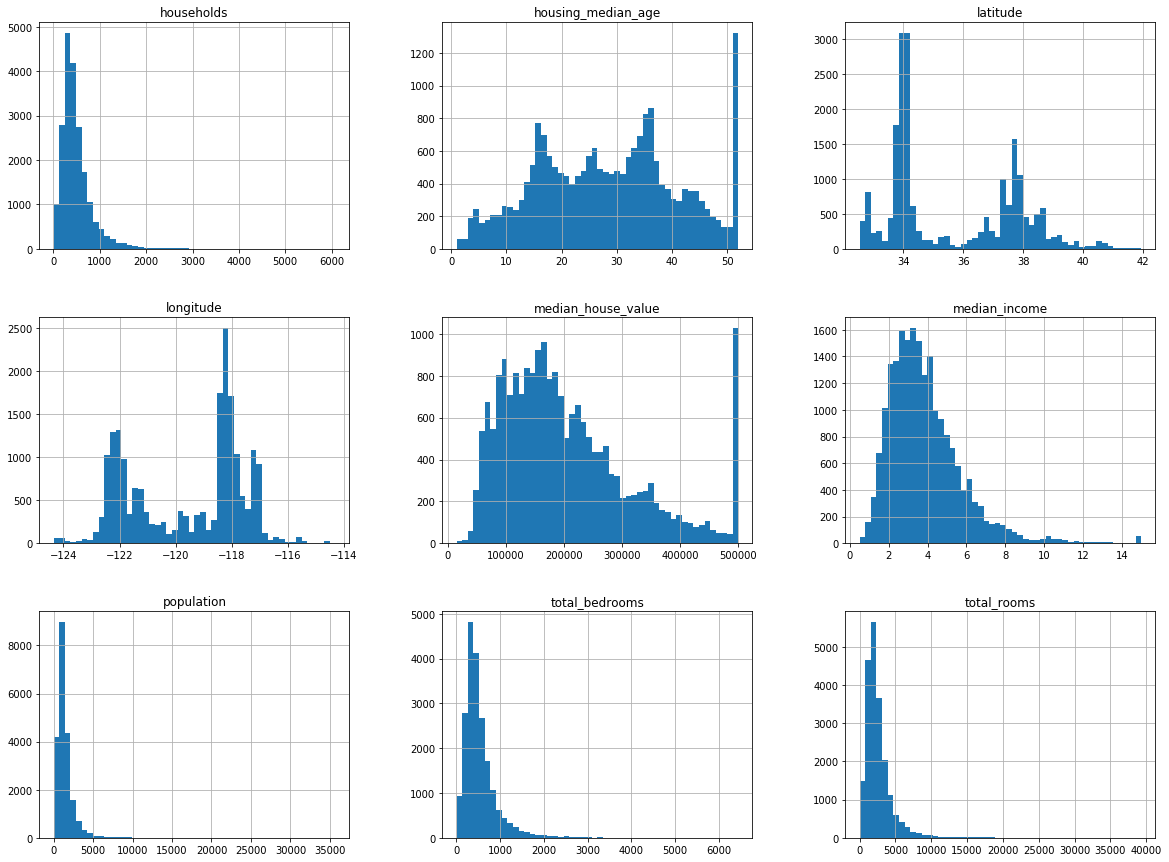

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
import numpy as np
#  this method will generate the different test and train sets every time it is executed
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [33]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")
# print(train_set)

16512 train + 4128 test
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10328    -117.76     33.84                15.0       3764.0           510.0   
2395     -119.34     37.12                23.0       1881.0           380.0   
231      -122.20     37.80                46.0       2041.0           405.0   
16013    -122.47     37.74                52.0       3797.0           668.0   
12341    -116.55     33.84                28.0       2992.0           562.0   
10511    -117.69     33.53                17.0       5041.0           778.0   
7610     -118.22     33.88                37.0       1149.0           280.0   
1395     -122.07     37.98                12.0       6915.0          1639.0   
17652    -121.88     37.26                13.0       1676.0           471.0   
12538    -121.49     38.56                52.0       1844.0           392.0   
14315    -117.14     32.70                40.0       1227.0           330.0   
13570    -117.29     34.14  

In [34]:
# print(test_set)

In [40]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
housing_with_id = housing.reset_index() # adds and 'index' column to the housig set
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(train_set)

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
6          6    -122.25     37.84                52.0       2535.0   
7          7    -122.25     37.84                52.0       3104.0   
8          8    -122.26     37.84                42.0       2555.0   
9          9    -122.25     37.84                52.0       3549.0   
10        10    -122.26     37.85                52.0       2202.0   
12        12    -122.26     37.85                52.0       2491.0   
13        13    -122.26     37.84                52.0        696.0   
14        14    -122.26     37.85                52.0       2643.0   
15        15    -122.26     37.85                50.0       1120.0   
16        16    -122

In [45]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, train_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(train_set)

       index  longitude  latitude  housing_median_age  total_rooms  \
8          8    -122.26     37.84                42.0       2555.0   
10        10    -122.26     37.85                52.0       2202.0   
11        11    -122.26     37.85                52.0       3503.0   
12        12    -122.26     37.85                52.0       2491.0   
13        13    -122.26     37.84                52.0        696.0   
14        14    -122.26     37.85                52.0       2643.0   
15        15    -122.26     37.85                50.0       1120.0   
18        18    -122.26     37.84                50.0       2239.0   
38        38    -122.26     37.83                52.0       1470.0   
39        39    -122.26     37.83                52.0       2432.0   
40        40    -122.26     37.83                52.0       1665.0   
41        41    -122.26     37.83                51.0        936.0   
42        42    -122.26     37.84                49.0        713.0   
43        43    -122